# Recommendation Engine

# ---------------------------------------------------------------------------

## This dataset is realted to the video gaming industry and a survey was coducted to build recommendation engine so that the store can improve the sales of its gaming DVD’s. Snapshot the dataset is given below build a recommendation engine and suggest top selling dvds to the store customers.

## -----------------------------------------------------------------------------------

### Business objective: To help the video gaming industry to build recommendation engine so that the store can improve the sales of its gaming DVD’s.

## -------------------------------------------------------------------------------------------

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

### import Dataset:

In [2]:
df = pd.read_csv("G:\\360digit\\assignments meterial\\recommendation sys\\game.csv", encoding = 'utf8')
df.head()

,userId,game,rating
0,3,The Legend of Zelda: Ocarina of Time,4.0
1,6,Tony Hawk's Pro Skater 2,5.0
2,8,Grand Theft Auto IV,4.0
3,10,SoulCalibur,4.0
4,11,Grand Theft Auto IV,4.5


In [3]:
df.shape

(5000, 3)

In [4]:
df.columns

Index(['userId', 'game', 'rating'], dtype='object')

In [5]:
df['userId'].unique

<bound method Series.unique of 0          3
1          6
2          8
3         10
4         11
        ... 
4995    4529
4996    4533
4997    4544
4998    4548
4999    4558
Name: userId, Length: 5000, dtype: int64>

In [6]:
# Calculate mean of rating column
c = df['rating'].mean()
c

3.5925

From the above output, you can observe that the average rating of a game is around 3.59 on a scale of 5.

In [7]:
df.head()

,userId,game,rating
0,3,The Legend of Zelda: Ocarina of Time,4.0
1,6,Tony Hawk's Pro Skater 2,5.0
2,8,Grand Theft Auto IV,4.0
3,10,SoulCalibur,4.0
4,11,Grand Theft Auto IV,4.5


### Visualization Imports:

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:



In [9]:
df.groupby('game')['rating'].mean().sort_values(ascending=False).head()

game
'Splosion Man                          5.0
Marvel Pinball                         5.0
Crimson Skies: High Road to Revenge    5.0
Crisis Core: Final Fantasy VII         5.0
Critter Crunch                         5.0
Name: rating, dtype: float64

In [10]:
df.groupby('game')['rating'].count().sort_values(ascending=False).head()

game
Madden NFL 07                7
Marvel: Ultimate Alliance    6
Tony Hawk's Pro Skater 3     6
This page isn’t working      6
Tony Hawk's Pro Skater 2     5
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(df.groupby('game')['rating'].mean())
ratings.head()

,rating
game,
'Splosion Man,5.0
007: The World is Not Enough,4.0
10 Second Ninja X,5.0
1001 Spikes,2.0
1701 A.D.,2.0


Now set the number of ratings column:



In [12]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('game')['rating'].count())
ratings.head()

,rating,num of ratings
game,,
'Splosion Man,5.0,1
007: The World is Not Enough,4.0,1
10 Second Ninja X,5.0,1
1001 Spikes,2.0,1
1701 A.D.,2.0,1


Now a few histograms:



<AxesSubplot:>

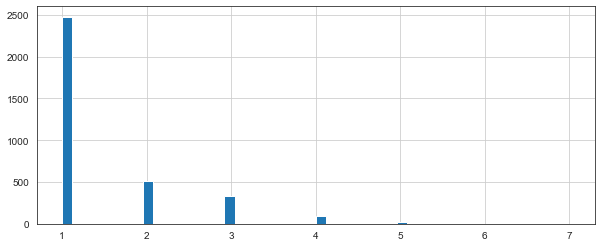

In [13]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=50)

<AxesSubplot:>

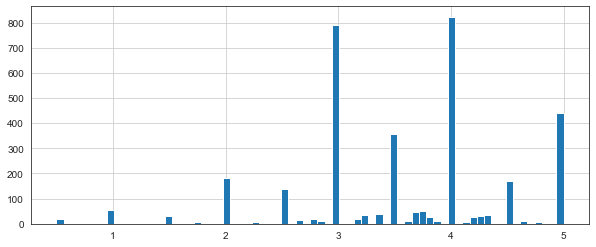

In [14]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

###### Sorting values according to the 'num of rating column:

In [15]:
gamemat = df.pivot_table(index ='userId',
              columns ='game', values ='rating')
  
gamemat.head()
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
game,,
Madden NFL 07,3.428571,7
Marvel: Ultimate Alliance,3.333333,6
Tony Hawk's Pro Skater 3,4.333333,6
This page isn’t working,4.000000,6
Tony Hawk's Pro Skater 2,4.000000,5
Tiger Woods PGA Tour 06,3.900000,5
Bit.Trip Presents...Runner2: Future Legend of Rhythm Alien,3.700000,5
LEGO Marvel Super Heroes,4.400000,5
Rayman Origins,4.000000,5


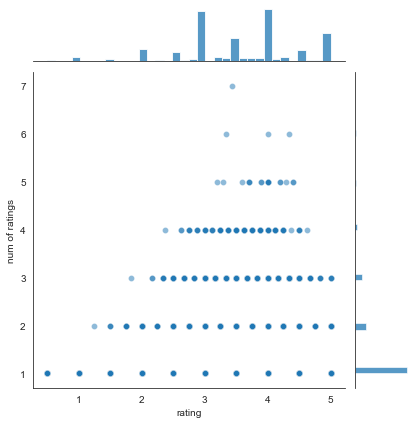

In [16]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Building The Recommender:

In [17]:
df.head()

,userId,game,rating
0,3,The Legend of Zelda: Ocarina of Time,4.0
1,6,Tony Hawk's Pro Skater 2,5.0
2,8,Grand Theft Auto IV,4.0
3,10,SoulCalibur,4.0
4,11,Grand Theft Auto IV,4.5


#### Calculating The Correlation:

In [39]:
game_user = df.pivot_table(index='userId',columns='game',values='rating')

game,'Splosion Man,007: The World is Not Enough,10 Second Ninja X,1001 Spikes,1701 A.D.,1979 Revolution: Black Friday,2002 FIFA World Cup,2010 FIFA World Cup South Africa,3D After Burner II,3D Gunstar Heroes,...,echochrome,echochrome ii,escapeVektor: Chapter 1,flower,ilomilo,inFamous,inFamous 2,inFamous: Festival of Blood,inFamous: Second Son,page not found
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above code will create a table where the rows are userIds and the columns represent the games. The values of the matrix represent the rating for each game by each user

In [40]:
game_user.head(10)

game,'Splosion Man,007: The World is Not Enough,10 Second Ninja X,1001 Spikes,1701 A.D.,1979 Revolution: Black Friday,2002 FIFA World Cup,2010 FIFA World Cup South Africa,3D After Burner II,3D Gunstar Heroes,...,echochrome,echochrome ii,escapeVektor: Chapter 1,flower,ilomilo,inFamous,inFamous 2,inFamous: Festival of Blood,inFamous: Second Son,page not found
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we need to select a game to test our recommender system. Choose any game title from the data. Here, I chose 1001 Spikes.

To find the correlation value for the game with all other games in the data we will pass all the ratings of the picked game to the corrwith method of the Pandas Dataframe. The method computes the pairwise correlation between rows or columns of a DataFrame with rows or columns of Series or DataFrame. 

In [41]:
correlations = game_user.corrwith(game_user['1701 A.D.'])
correlations

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


game
'Splosion Man                  NaN
007: The World is Not Enough   NaN
10 Second Ninja X              NaN
1001 Spikes                    NaN
1701 A.D.                      NaN
                                ..
inFamous                       NaN
inFamous 2                     NaN
inFamous: Festival of Blood    NaN
inFamous: Second Son           NaN
page not found                 NaN
Length: 3438, dtype: float64

Now we will remove all the empty values and merge the total ratings to the correlation table.

In [42]:
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(ratings['num of ratings'])
recommendation.head()

,Correlation,num of ratings
game,,


In [43]:
recc = recommendation[recommendation['num of ratings']>0].sort_values('Correlation',ascending=False).reset_index()

In [44]:
recc

,game,Correlation,num of ratings
